In [0]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn import svm
import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import files 
db = files.upload()

Saving train.csv to train.csv


In [4]:
df = pd.read_csv(io.BytesIO(db['train.csv']))
df.head()

,Unnamed: 0,index,id,theta1,theta2,theta3,theta4,theta5,theta6,thetad1,thetad2,thetad3,thetad4,thetad5,thetad6,tau1,tau2,tau3,tau4,tau5,dm1,dm2,dm3,dm4,dm5,da1,da2,da3,da4,da5,db1,db2,db3,db4,db5,target
0,0,6633,6633,1.258655,-0.929410,-0.050415,1.607280,-1.666597,-0.562623,-2.119564,2.811831,1.187248,-0.280283,-2.319507,-2.038873,-53.564889,-68.612931,41.047982,-48.551157,-39.716115,0.597409,2.790619,0.657923,-0.098850,2.588032,2.923102,1.900982,2.847008,1.694073,2.655953,2.560639,0.539491,1.198796,1.102964,2.200707,-0.260065
1,1,3767,3767,-0.378386,1.898102,0.137376,-2.138864,0.376567,-0.470433,-0.128412,2.422957,0.099426,1.464426,1.073276,-0.289731,1.866960,-48.051891,-45.441660,-11.779886,-11.045763,0.833313,1.211213,1.263079,2.147579,1.540373,0.560585,2.127900,0.941831,1.008708,2.117702,0.880092,0.536593,1.338949,1.780534,1.236617,-0.204540
2,2,1224,1224,-0.611485,0.900391,-0.263779,0.021346,2.097770,0.952058,0.991799,-0.357290,-2.077107,0.863809,-0.705093,0.276720,-38.844825,-64.542480,-43.314732,-59.206762,47.318185,0.913952,1.046076,0.628606,2.484231,2.430639,3.046672,1.815471,0.900659,0.703724,2.219781,2.447250,1.239661,1.288070,2.462066,2.240620,0.559202
3,3,3273,3273,2.217917,1.709197,2.421718,0.363645,2.080355,-0.869141,2.061683,0.293324,-0.419036,1.459497,-0.751151,2.413695,-50.086913,17.500236,-4.291154,-58.060193,29.480948,2.404851,0.783482,1.013806,2.495296,1.677704,1.879936,2.618496,2.458995,0.537412,2.602852,2.632219,0.755637,2.973980,2.851321,1.028781,-0.342738
4,4,4446,4446,-2.380334,-1.426494,-1.665380,-1.018660,2.080026,3.152886,0.557293,0.058471,-0.058549,-1.015758,1.010205,-0.079878,-21.148606,-45.036665,-72.554117,65.175332,-55.480980,1.164274,2.830625,1.013828,1.946145,2.150017,1.202644,1.527161,1.470630,1.060353,0.446626,2.519833,1.992571,1.263569,0.810387,1.646483,-0.703350


In [5]:
df.columns

Index(['Unnamed: 0', 'index', 'id', 'theta1', 'theta2', 'theta3', 'theta4',
       'theta5', 'theta6', 'thetad1', 'thetad2', 'thetad3', 'thetad4',
       'thetad5', 'thetad6', 'tau1', 'tau2', 'tau3', 'tau4', 'tau5', 'dm1',
       'dm2', 'dm3', 'dm4', 'dm5', 'da1', 'da2', 'da3', 'da4', 'da5', 'db1',
       'db2', 'db3', 'db4', 'db5', 'target'],
      dtype='object')

In [6]:
df.isnull().values.any()

False

In [0]:
X = df[['theta1', 'theta2', 'theta3', 'theta4',
       'theta5', 'theta6', 'thetad1', 'thetad2', 'thetad3', 'thetad4',
       'thetad5', 'thetad6', 'tau1', 'tau2', 'tau3', 'tau4', 'tau5', 'dm1',
       'dm2', 'dm3', 'dm4', 'dm5', 'da1', 'da2', 'da3', 'da4', 'da5', 'db1',
       'db2', 'db3', 'db4', 'db5']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)


# **Correlation**
### First attempt at feature selection is checking the correlation between the features and then reducing the features which are correlated. But unfortunately the correlation matrix suggest that the features are more independent correlation score is lesser than 0.3.

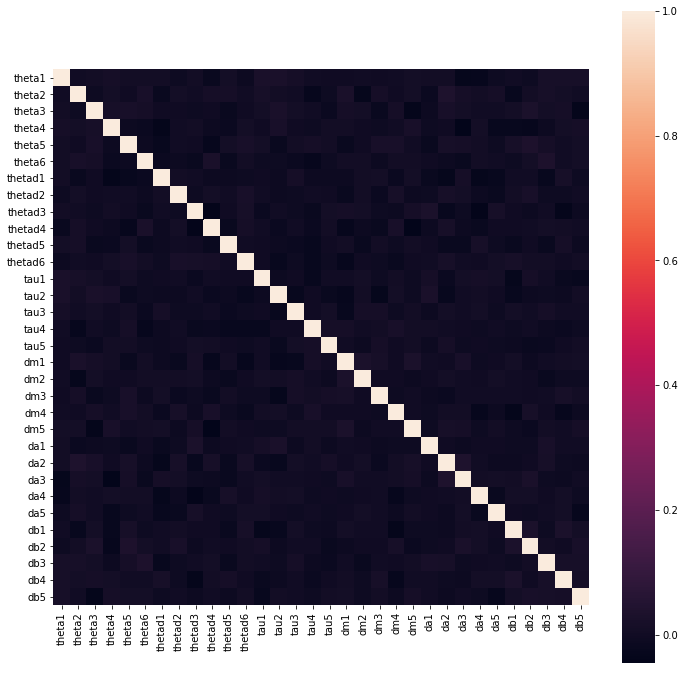

In [8]:
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, square=True);

### Here correlation between the features is very less. Most of them less than 0.1 . Hence we may need to find further more methods for feature reduction.
### And hence Pearson's Correlation may not work here. 
### Next we shall see the pairplots.



In [96]:
sns.pairplot(df)

### Now we will be using Principal Component Analyisis along with

*   Linear Regression
*   Support Vector Regression
*   Random Forest Regression Model














In [0]:
from sklearn.preprocessing import StandardScaler
X_scaled = x = StandardScaler().fit_transform(X)


In [84]:
name = ['principal component 1', 'principal component 2' , 'principal component 3' , 'principal component 4']
for i in range (5 , 32):
  namenew = 'Principal Component' + str(i)
  name.append(namenew)
  pca = PCA(n_components= i) 
  principalComponents = pca.fit_transform(X_scaled)
  principalDf = pd.DataFrame(data = principalComponents
             , columns = name)
  
  X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.33, random_state=42)
  linearRegressor = LinearRegression()
  linearRegressor.fit(X_train , y_train)
  y_pred = linearRegressor.predict(X_test)
  err = mean_squared_error(y_test, y_pred)
  print(i)
  print("Error is ")
  print(err)
  

5
Error is 
0.2473154667736318
6
Error is 
0.2475939230267652
7
Error is 
0.24787142322843017
8
Error is 
0.2479489788696657
9
Error is 
0.2480424247948748
10
Error is 
0.2483190997379798
11
Error is 
0.2481020388687352
12
Error is 
0.24797492285054734
13
Error is 
0.2481660178996091
14
Error is 
0.24820835448917714
15
Error is 
0.24845525828574175
16
Error is 
0.24886813154514006
17
Error is 
0.2486129777315688
18
Error is 
0.24882589387417262
19
Error is 
0.24887860030720851
20
Error is 
0.24917223997124324
21
Error is 
0.2489159811840885
22
Error is 
0.24927929458308185
23
Error is 
0.2493097846509701
24
Error is 
0.2492938364402352
25
Error is 
0.24926405170183993
26
Error is 
0.24938859341444555
27
Error is 
0.24940230973876676
28
Error is 
0.24994864856934065
29
Error is 
0.2501809110555421
30
Error is 
0.2501808566459923
31
Error is 
0.25023993709879816


### These are error metrics for different numbers of features using PCA. There is minimum error when it is 12.

# PCA AND SVR

In [0]:
from sklearn.svm import SVR


In [23]:
name = ['principal component 1', 'principal component 2' , 'principal component 3' , 'principal component 4']
for i in range (5 , 32):
  namenew = 'Principal Component' + str(i)
  name.append(namenew)
  pca = PCA(n_components= i) 
  principalComponents = pca.fit_transform(X_scaled)
  principalDf = pd.DataFrame(data = principalComponents
             , columns = name)
  
  X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.33, random_state=42)
  regressor=SVR()
  regressor.fit(X_train , y_train)
  y_pred = regressor.predict(X_test)
  err = mean_squared_error(y_test, y_pred)
  print(i)
  print("Error is ")
  print(err)
  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


5
Error is 
0.2605923317256196


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


6
Error is 
0.2673111427058108


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


7
Error is 
0.2682874043032142


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


8
Error is 
0.267837842184876


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


9
Error is 
0.26913619201769007


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


10
Error is 
0.2723179693579251


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


11
Error is 
0.2688129427667573


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


12
Error is 
0.27392092715487903


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


13
Error is 
0.27815782449902576


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


14
Error is 
0.2804454048299203


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


15
Error is 
0.27780295663645715


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


16
Error is 
0.28080913355321174


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


17
Error is 
0.2839508518765786


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


18
Error is 
0.28777615257484435


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


19
Error is 
0.28181802868930833


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


20
Error is 
0.2874906659370286


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


21
Error is 
0.284891350756946


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


22
Error is 
0.2843825834509029


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


23
Error is 
0.282973670503644


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


24
Error is 
0.28376602316438393


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


25
Error is 
0.28372672617699474


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


26
Error is 
0.28156444349928184


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


27
Error is 
0.2787734490072461


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


28
Error is 
0.2767081340984142


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


29
Error is 
0.27834739600313574


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


30
Error is 
0.27872220222557786


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


31
Error is 
0.2796302571722788


### Tried to implement GridSearchCV in order to tune SVR , but it took a lot of computation time and thus I had to manually interrupt it and drop the idea.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.001, 0.01, 0.1, 1, 10],
            'gamma': [0.0001, 0.001, 0.1, 1]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

# Recursive Feature Elimination along with LR and Random Forest.

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor


### Random Forest and RFE for features ranging from 7 to 24. Reduced the feature range here in order to meet with computational time expenses.

In [61]:
Error_array = []
for i in range (7 , 24):
  
  
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

  rfr = RandomForestRegressor(random_state=101)

  rfe = RFE(estimator=rfr, step=1, n_features_to_select = i)
  rfe.fit(X_train, y_train)
  col_bools = rfe.support_ 
  X_s = X.loc[:, col_bools]
  X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.33, random_state=42)
  rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
  rf.fit(X_train, y_train);
  y_pred = rf.predict(X_test)
  err = mean_squared_error(y_test, y_pred)
  Error_array.append(err)
  print(i)
  print("Error is ")
  print(err)
  

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

7
Error is 
0.25692707730612196


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

8
Error is 
0.25810522159815424


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

9
Error is 
0.2567766759485747


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

10
Error is 
0.25587391804092324


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

11
Error is 
0.25560176847702587


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

12
Error is 
0.25402347837538575


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

13
Error is 
0.25357525660369806


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

14
Error is 
0.25280858701315395


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

15
Error is 
0.25278217006230297


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

16
Error is 
0.2517270278583936


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

17
Error is 
0.2519417398111147


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

18
Error is 
0.2510078423915282


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

19
Error is 
0.251161943448937


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

20
Error is 
0.25138722226337185


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

21
Error is 
0.2508240006182911


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

22
Error is 
0.2503287726978902


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

23
Error is 
0.24999941063022216


In [0]:
Error_array_RF 

### Here then RFE with Linear Regression with features in range 5 to 24.

In [65]:
Error_array_LR = []
for i in range (5 , 24):
  
  
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

  linearRegressor = LinearRegression()


  rfe = RFE(estimator=linearRegressor, step=1, n_features_to_select = i)
  rfe.fit(X_train, y_train)
  col_bools = rfe.support_ 
  X_s = X.loc[:, col_bools]
  X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.33, random_state=42)
  Lr = LinearRegression()
  Lr.fit(X_train , y_train)
  y_pred = Lr.predict(X_test)
  err = mean_squared_error(y_test, y_pred)
  Error_array.append(err)
  print(i)
  print("Error is ")
  print(err)
  

5
Error is 
0.2482241500484471
6
Error is 
0.2484688872536924
7
Error is 
0.24871737411350917
8
Error is 
0.2489138764890886
9
Error is 
0.24926197970765354
10
Error is 
0.24932761444984672
11
Error is 
0.24942882543472536
12
Error is 
0.2494705931719474
13
Error is 
0.24956598509554617
14
Error is 
0.24945406090792197
15
Error is 
0.24945193597953316
16
Error is 
0.24951539981354598
17
Error is 
0.2497989217701534
18
Error is 
0.24979924585143848
19
Error is 
0.2498493584772929
20
Error is 
0.24989868893074305
21
Error is 
0.249949103760483
22
Error is 
0.2499861508061488
23
Error is 
0.24997865945350523


#This is the output part. Includes two models :-


## 1. PCA and Linear Regression
## 2. RFE and then Linear Regression

### Includes applying the model and downloading it to drive from colab. and hence not well written,



In [0]:
linearRegressor = LinearRegression()
  linearRegressor.fit(X_train , y_train)
  y_pred = linearRegressor.predict(X_test)
  err = mean_squared_error(y_test, y_pred)

In [54]:
col_bools = rfe.support_ 
X.loc[:, col_bools].head()

,theta2,theta3,thetad3,thetad4,tau3,dm3,da1,da2,da3,da4,da5,db1,db3
0,-0.929410,-0.050415,1.187248,-0.280283,41.047982,0.657923,2.923102,1.900982,2.847008,1.694073,2.655953,2.560639,1.198796
1,1.898102,0.137376,0.099426,1.464426,-45.441660,1.263079,0.560585,2.127900,0.941831,1.008708,2.117702,0.880092,1.338949
2,0.900391,-0.263779,-2.077107,0.863809,-43.314732,0.628606,3.046672,1.815471,0.900659,0.703724,2.219781,2.447250,1.288070
3,1.709197,2.421718,-0.419036,1.459497,-4.291154,1.013806,1.879936,2.618496,2.458995,0.537412,2.602852,2.632219,2.973980
4,-1.426494,-1.665380,-0.058549,-1.015758,-72.554117,1.013828,1.202644,1.527161,1.470630,1.060353,0.446626,2.519833,1.263569


In [0]:
X_s = X.loc[:, col_bools]
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.33, random_state=42)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

In [56]:
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred)

0.25357525660369806

In [0]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)


In [70]:
from google.colab import files
db = files.upload()

Saving test(1).csv to test(1).csv


In [71]:
df_test = pd.read_csv(io.BytesIO(db['test(1).csv']))
df_test.head()

,Unnamed: 0,index,id,theta1,theta2,theta3,theta4,theta5,theta6,thetad1,thetad2,thetad3,thetad4,thetad5,thetad6,tau1,tau2,tau3,tau4,tau5,dm1,dm2,dm3,dm4,dm5,da1,da2,da3,da4,da5,db1,db2,db3,db4,db5
0,0,2133,2133,2.533249,-0.792764,-2.177767,-1.110612,-1.273932,-0.228057,-1.043535,3.537794,-0.429972,1.053080,-1.141982,1.683636,55.741175,28.640347,66.103405,-19.239191,-28.314448,2.357788,0.461962,1.877112,1.445198,1.015553,1.290247,1.557358,0.561434,2.746378,2.916253,1.432392,-0.040619,2.225802,2.418217,1.705286
1,1,6389,6389,-1.157607,0.815686,2.410577,-0.321521,-0.579014,-1.047877,1.708049,-1.243202,2.274981,-1.122352,2.543765,1.011484,0.787786,4.755294,14.688592,-62.321773,42.279532,2.386273,1.188765,0.344364,2.008869,2.367924,1.816308,2.367484,2.088922,1.402735,1.889066,1.351893,2.437513,2.875317,2.363191,1.400312
2,2,4496,4496,0.817617,1.775667,-1.579402,-0.943133,0.571878,-1.158937,1.794551,2.464161,-2.728984,1.716588,0.043886,0.514001,-23.215129,-45.089230,-74.748256,-73.969103,-34.135560,2.401595,0.818665,2.173091,1.911137,2.858870,1.401952,1.392231,0.432919,1.921923,1.573775,1.104550,1.097384,1.959356,0.114303,2.600579
3,3,2400,2400,1.942009,2.897571,-0.833998,-0.868103,-0.747734,2.151514,-0.450202,-0.302839,1.761965,-0.716203,1.002752,2.328006,62.795894,-14.882174,-9.322329,69.292815,21.471488,2.537389,2.665085,2.149466,0.873216,1.980152,1.994579,1.729033,2.381447,2.300106,0.014986,2.641325,1.581736,0.960167,1.542038,1.231497
4,4,4519,4519,-0.691687,0.389034,-0.573441,-0.652371,0.645799,0.078332,-1.618586,-0.313952,2.273147,1.895342,-2.179040,-0.983684,-29.347345,-57.211466,4.245981,60.863325,-15.974872,2.624083,2.317160,2.078375,2.410211,1.997150,1.341282,1.774178,1.969909,0.879087,1.592115,2.701025,1.652432,0.397457,1.933247,1.084829


In [0]:
X_t = df_test[['theta1', 'theta2', 'theta3', 'theta4',
       'theta5', 'theta6', 'thetad1', 'thetad2', 'thetad3', 'thetad4',
       'thetad5', 'thetad6', 'tau1', 'tau2', 'tau3', 'tau4', 'tau5', 'dm1',
       'dm2', 'dm3', 'dm4', 'dm5', 'da1', 'da2', 'da3', 'da4', 'da5', 'db1',
       'db2', 'db3', 'db4', 'db5']]


In [0]:
rfe = RFE(estimator=linearRegressor, step=1, n_features_to_select = 8)
rfe.fit(X, y)
col_bools = rfe.support_ 
X_s = X.loc[:, col_bools]
X_s_t = X_t.loc[:, col_bools]
Lr = LinearRegression()
Lr.fit(X_s , y)
y_op = Lr.predict(X_s_t)

In [0]:
name = ['principal component 1', 'principal component 2' , 'principal component 3' , 'principal component 4']
for i in range (5 , 13):
  namenew = 'Principal Component' + str(i)
  name.append(namenew)

In [0]:
pca = PCA(n_components= 12) 
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = name)

principalComponents2 = pca.fit_transform(X_scaled_t)
principalDf_t = pd.DataFrame(data = principalComponents2
             , columns = name)

In [0]:
from sklearn.preprocessing import StandardScaler
X_scaled_t = x = StandardScaler().fit_transform(X_t)


In [0]:

linearRegressor = LinearRegression()
linearRegressor.fit(principalDf , y)
y_op = linearRegressor.predict(principalDf_t)



In [0]:
df_sub = df_test[['id']]

In [0]:
df_target = pd.DataFrame(y_op, columns= ['target'])

In [0]:
df_sub = pd.concat([df_sub,df_target], axis=1)

In [81]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
df_sub.to_csv('submission3.csv')
!cp submission3.csv drive/My\ Drive/